In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

def sigmoid_activ(x): 
    return 0.5 * (1 + np.tanh(x))

def sample_pbit(prob):
    return 1 if np.random.rand() < prob else -1

def MAF(data, window_len = 1000): # moving average filter
    out = np.zeros([len(data) - window_len])
    for i in range(len(out)):
        out[i] = np.sum(data[i:i+window_len-1])/window_len
    return out

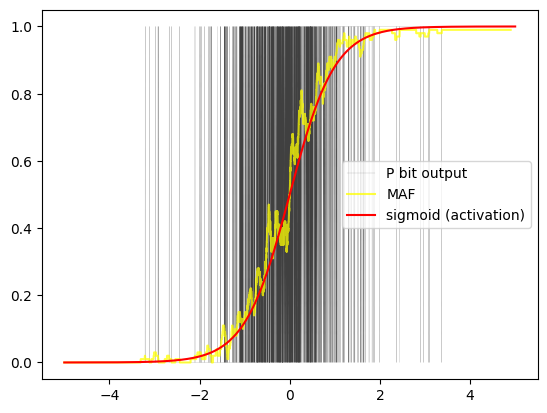

In [7]:
bias = np.linspace(-5, 5, 10000)
prob_activ = sigmoid_activ(bias)
pbit_val = [(sample_pbit(p)+1)/2 for p in prob_activ]
window_len = 100
pbit_val_maf = MAF(pbit_val, window_len)
plt.plot(bias, pbit_val, linewidth = 0.1, c = "black", alpha = 0.75, label = "P bit output")
plt.plot(bias[0:-window_len], pbit_val_maf, "-", c = "yellow", alpha = 0.75, label = "MAF")
plt.plot(bias, prob_activ, "-", c = "red", alpha = 1, label = "sigmoid (activation)")
plt.legend()


In [32]:
def XOR_PSL_interconnection(pbit_cs, hx, Jx, I0):
    I = -I0 * (hx + np.matmul(Jx, pbit_cs))
    # print(I)
    prob = sigmoid_activ(I)
    pbit_ns = [(sample_pbit(p)+1)/2 for p in prob]
    return pbit_ns

In [29]:
## XOR gate with PSL

hX = np.array([+1, +1, +1, +1, -3, -3, 2])

JX = np.array([
    [ 0,  0, -1, -1,  0,  2,  0],
    [ 0,  0, -1, -1,  2,  0,  0],
    [-1, -1,  0,  0,  2,  0,  0],
    [-1, -1,  0,  0,  0,  2,  0],
    [ 0,  2,  2,  0,  0, -1,  2],
    [ 2,  0,  0,  2, -1,  0,  2],
    [ 0,  0,  0,  0,  2,  2,  0]
])

## defining 7 pbits
# number of samples 
no_pbits = 7
no_sample = 100000
pbits = np.zeros([no_sample, no_pbits])


In [30]:
I0 = 0.1
for i in range(1, no_sample):
    # # constraining the inputs of P-bits
    # pbits[i-1][0] = 0 #A -> 1
    # pbits[i-1][1] = 0 #B -> 1
    
    pbits[i] = XOR_PSL_interconnection(pbits[i-1], hX, JX, I0)


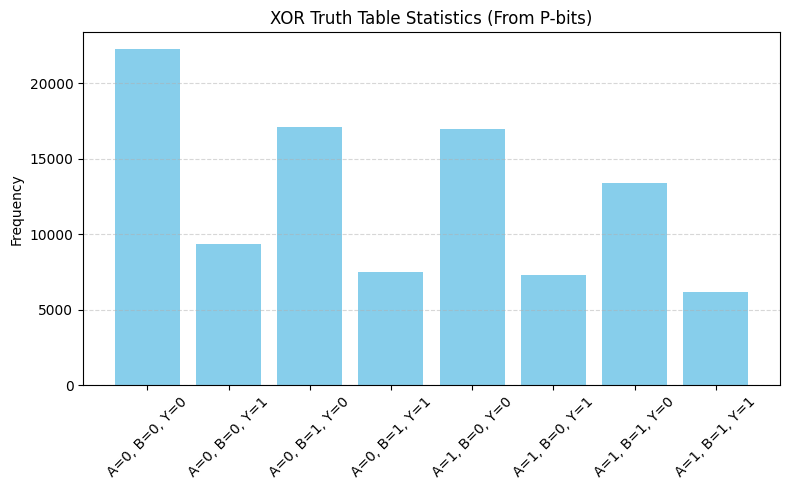

In [31]:
# Extract inputs and output
A = (pbits[:, 0]).astype(int)  # map -1 -> 0, +1 -> 1
B = (pbits[:, 1]).astype(int)
XOR_out = (pbits[:, 6]).astype(int)

# Create a 3D table (2D with value = frequency of XOR output)
from collections import Counter
counts = Counter()

for a, b, o in zip(A, B, XOR_out):
    counts[(a, b, o)] += 1

# Plot as bar chart
fig = plt.figure(figsize=(8, 5))
bars = []
labels = []

for i, ((a, b, o), count) in enumerate(sorted(counts.items())):
    bars.append(count)
    labels.append(f"A={a}, B={b}, Y={o}")

plt.bar(labels, bars, color='skyblue')
plt.ylabel("Frequency")
plt.title("XOR Truth Table Statistics (From P-bits)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
